# UTS

## Metode K-NN

mengambil dataset dari url dan membacanya dengan menggunakan library pandas

In [66]:
import pandas as pd
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')

Menampilkan data yang di peroleh dengan menggunakan fungsi head() dari pandas

In [67]:
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [68]:
dataset.shape

(116, 10)

Mendefinisakn nilai dari X dan y, X merupakan data semua kolom tanpa kolom Classification dan untuk y merupakan data dari kolom Classification

In [69]:
X = dataset.drop(columns=["Classification"]).values
y = dataset.Classification

mmisahkan data antara data test dan data train menggunakan fungsi train_test_split dari library sklearn.model_selection

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((92, 9), (24, 9), (92,), (24,))

Melakukan Klasifikasi dengan menggunakan Library sklearn.neighbors dengan menggunakan K dari 3 sampai dengan 6

In [71]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(3,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

Akurasi dari hasil klasifikasi di simpan dalam Variabel score sehingga dari k 3 sampai 26 menghasilkan seperti nilai di bawah

In [72]:
#Testing accuracy for each value of K
scores

{3: 0.5,
 4: 0.375,
 5: 0.4583333333333333,
 6: 0.5416666666666666,
 7: 0.5416666666666666,
 8: 0.5833333333333334,
 9: 0.375,
 10: 0.5416666666666666,
 11: 0.4583333333333333,
 12: 0.5416666666666666,
 13: 0.375,
 14: 0.5,
 15: 0.5,
 16: 0.4583333333333333,
 17: 0.5,
 18: 0.4583333333333333,
 19: 0.4166666666666667,
 20: 0.4166666666666667,
 21: 0.4166666666666667,
 22: 0.4583333333333333,
 23: 0.4166666666666667,
 24: 0.375,
 25: 0.4166666666666667}

menampilkan hasil klasifikiasi dengan menggunakan library matplotlib 

Text(0, 0.5, 'Testing Accuracy')

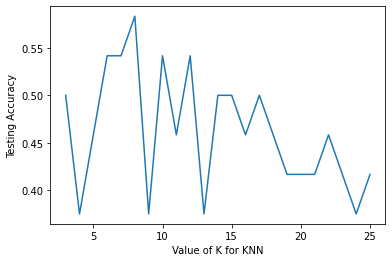

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Menguji dengan data random dengan menggunakan K yang akurasi nya tinggi sesuai dengan hasil yang di peroleh di atas yaitu K = 8

In [86]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=8)

In [87]:
classes = {1:'Healthy controls',2:'Patients'}

#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[20, 21, 80, 3.23, 0.2, 10.17, 12.334, 23.21, 521.23],
         [30, 53, 27, 2.234, 0.34, 11.234, 12.3, 21.341, 123.133]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

Healthy controls
Healthy controls


dengan menggunakan K = 8 menghasilkan bahwa data random termasuk sebagai Healthy Controls

## Metode Desision tree

In [88]:
from sklearn import tree
from matplotlib import pyplot as plt
# Create DecisionTree Classifier
clf_tree = tree.DecisionTreeClassifier(criterion="entropy")
clf_tree = clf_tree.fit(X_train, y_train)

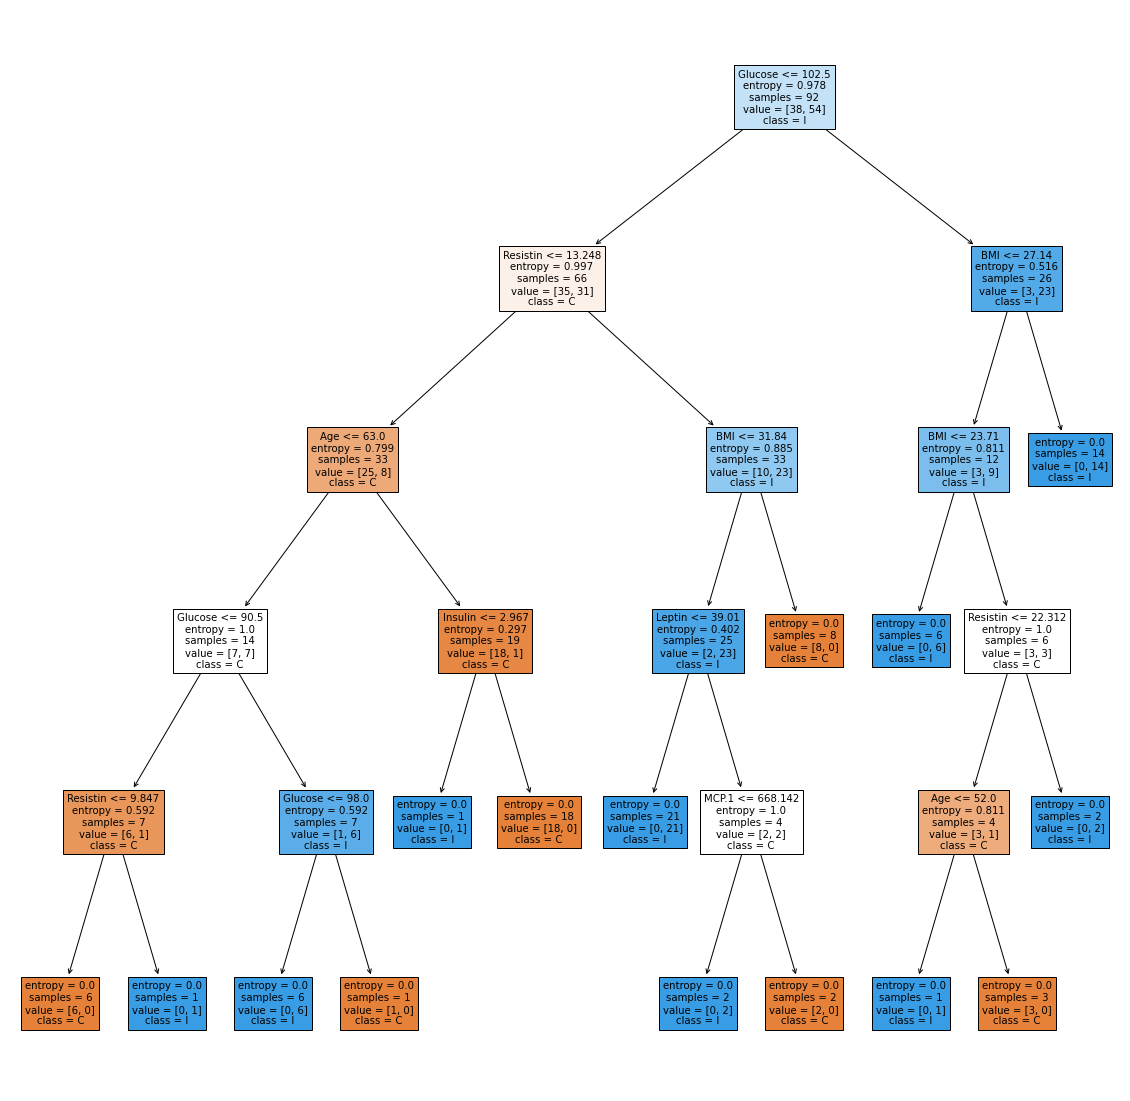

In [89]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf_tree, feature_names=list(dataset.columns.values)[:9], class_names=list(dataset.columns.values)[9] ,filled=True)

In [91]:
print("Score data latih :", clf_tree.score(X_train, y_train))
print("Score data uji   :", clf_tree.score(X_test, y_test))

Score data latih : 1.0
Score data uji   : 0.625
